<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Matplotlib is building the font cache; this may take a moment.


#### Read the dataset in the csv file from the URL


In [7]:
import ssl
import urllib3
import io
import requests
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS = 'ALL:@SECLEVEL=1'

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
result = requests.get(boston_url)


In [10]:

boston_df=pd.read_csv(io.BytesIO(result.content), sep=',')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


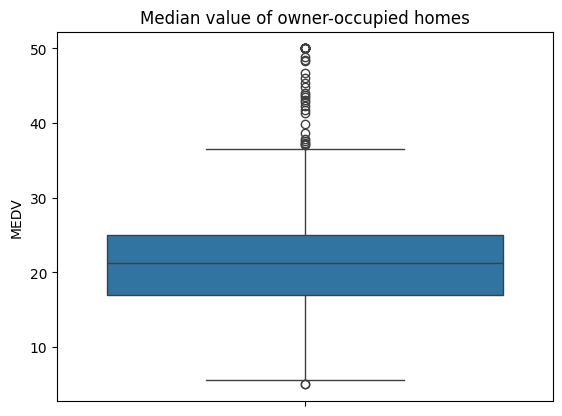

In [12]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df).set(title="Median value of owner-occupied homes")

### Observations
The box plot shows that the median value of owner-occupied homes is concentrated around 21, with a significant number of higher-priced homes represented by the outliers. The distribution is somewhat right-skewed, indicated by the longer upper whisker and the outliers above the upper whisker. This skewness suggests a substantial portion of the data has higher values than the median value.

In [13]:
# Provide a bar plot for the Charles river variable
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
sns.set(style="whitegrid")
cr_df = boston_df[["CHAS"]].groupby("CHAS").size().reset_index(name='counts')

# ax = sns.barplot(x="CHAS", data=boston_df)
cr_df["desc"] = "tract does not bound river"
cr_df.loc[cr_df["CHAS"]==1, "desc"] = "tract bounds river"
cr_df

,CHAS,counts,desc
0,0.0,471,tract does not bound river
1,1.0,35,tract bounds river


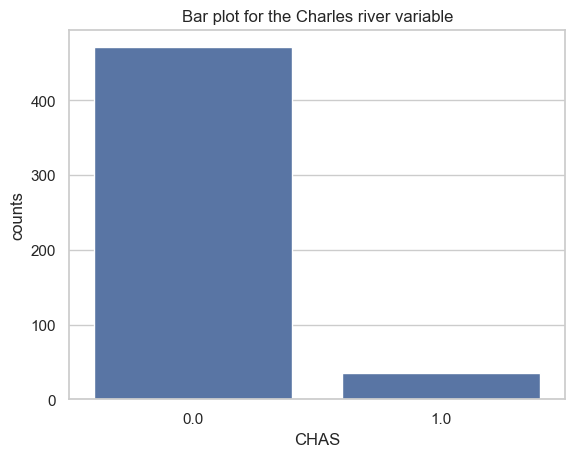

In [14]:
ax = sns.barplot(x="CHAS", y="counts", data=cr_df).set(title="Bar plot for the Charles river variable")

### Observations
The data strongly indicates that most properties in the dataset are far from the Charles River.

In [15]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

medv_df = boston_df[["MEDV", "AGE"]]
# medv_df

# medv_df["age_group"] = "<= 35"
medv_df.loc[medv_df["AGE"]<= 35, "age_group"] = "<= 35"
medv_df.loc[(medv_df["AGE"]>35) & (medv_df["AGE"]<70), "age_group"] = "35 to 70"
medv_df.loc[medv_df["AGE"]>=70, "age_group"] = "> 70"
medv_df

/var/folders/z8/36vh9y4d5qv83sxybfv1vtvh0000gn/T/ipykernel_64628/4060340761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medv_df.loc[medv_df["AGE"]<= 35, "age_group"] = "<= 35"


,MEDV,AGE,age_group
0,24.0,65.2,35 to 70
1,21.6,78.9,> 70
2,34.7,61.1,35 to 70
3,33.4,45.8,35 to 70
4,36.2,54.2,35 to 70
...,...,...,...
501,22.4,69.1,35 to 70
502,20.6,76.7,> 70
503,23.9,91.0,> 70
504,22.0,89.3,> 70


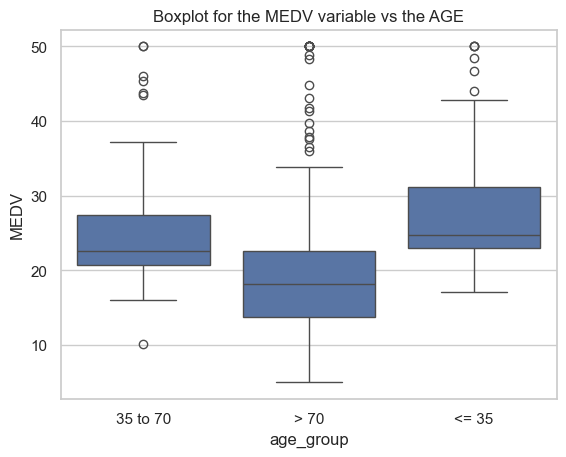

In [16]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x="age_group", y='MEDV', data=medv_df).set(title="Boxplot for the MEDV variable vs the AGE")

### Observations:

Median Values: The median MEDV seems to be relatively similar across all three age groups. There isn't a significant difference in the central tendency.

Spread of Data: The spread of MEDV is noticeably different among the groups. The group with homes older than 70 years shows a larger range of MEDV values. This suggests that the house prices in this older age group have a higher variability.

Outliers: There are several outliers, particularly in the >70 and 35 to 70 groups. These outliers represent houses with unusually high or low values compared to others in their respective age groups.

#### In Summary:

The boxplot suggests that while the median house price might not differ dramatically based on age, the variability (spread) and the number of outliers do vary between age groups. The group of homes older than 70 years shows the greatest variability in house prices. This implies that factors other than just age might be significant determinants of house prices.

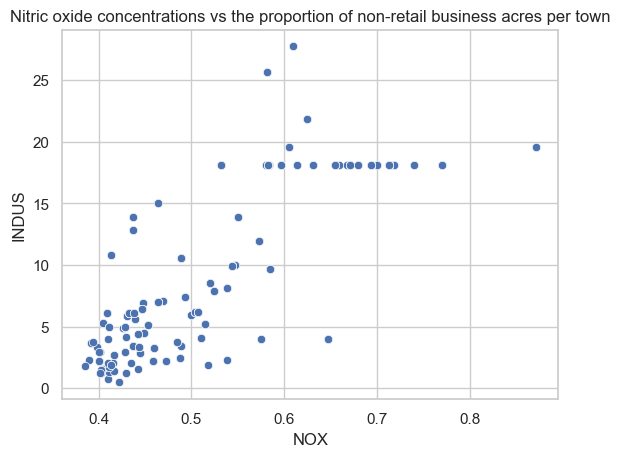

In [17]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title="Nitric oxide concentrations vs the proportion of non-retail business acres per town")

### Observations
* The scatterplot shows a positive correlation between NOX and INDUS. As the value of NOX increases, the value of INDUS also tends to increase. However, the relationship isn't perfectly linear; there's some scatter, and the relationship is stronger at lower values of NOX. 

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

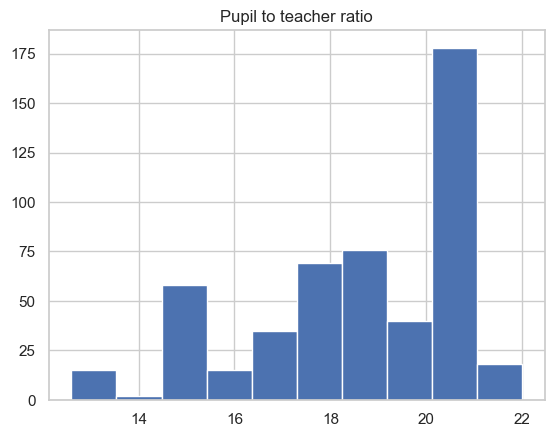

In [18]:
# Create a histogram for the pupil to teacher ratio variable
# sns.catplot(x='PTRATIO', kind='count', data=boston_df)
fig, ax = pyplot.subplots(1, 1) 
ax.set_title("Pupil to teacher ratio") 
ax.hist(boston_df['PTRATIO'])

### Observations
The distribution is somewhat skewed to the right (positively skewed). This means there are more schools/districts with lower pupil-to-teacher ratios than there are with very high ones.

### T-Test: Is there a significant difference in median value of houses bounded by the Charles river or not?
The hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")


In [23]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.0032381193676398632))

In [24]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

### Conclusion
* There is a significant difference in median value of houses bounded by the Charles river since p-value is less than α = 0.05

### ANOVA: Is there a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
The hypothesis
* $H_0: µ_1 = µ_2$ ("the three population medians are equal - there is no difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
* $H_1: $ ("At least one of the means differ - there is a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")


In [26]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(medv_df[medv_df['age_group'] == '<= 35']['MEDV'],
                   medv_df[medv_df['age_group'] == '35 to 70']['MEDV'], 
                   medv_df[medv_df['age_group'] == '> 70']['MEDV'], 
                   center='mean')


LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259189))

In [27]:
thirtyfive_lower = medv_df[medv_df['age_group'] == '<= 35']['MEDV']
thirtyfive_seventy = medv_df[medv_df['age_group'] == '35 to 70']['MEDV']
seventy_older = medv_df[medv_df['age_group'] == '> 70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Conclusion
* At least one of the means differ - there is a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

### Pearson Correlation
* Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

The hypothesis
* $H_0: $ There is no Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* $H_1: $ There is a Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

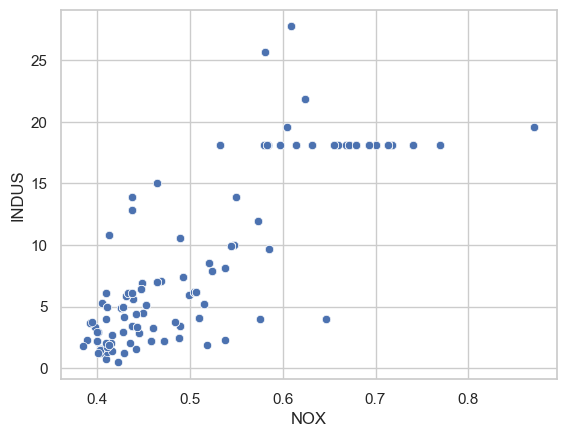

In [32]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [31]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241171e-98))

### Conclusion
* Since the p-value is less than 0.05, there is a Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. The scatterplot shows a positive correlation between NOX and INDUS. As the value of NOX increases, the value of INDUS also tends to increase. However, the relationship isn't perfectly linear; there's some scatter, and the relationship is stronger at lower values of NOX. 

### Regression Analysis
* Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
The hypothesis
* $H_0: $ There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
* $H_1: $ There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [36]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        21:48:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

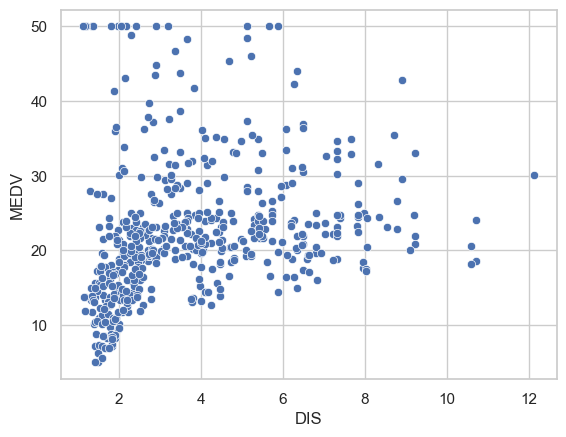

In [35]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

### Conclusion
* Since p-value is < 0.05, there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes. The scatterplot shows a generally negative relationship between DIS (distance to employment centers) and MEDV (median value of owner-occupied homes). This means that as the distance to employment centers increases (DIS goes up), the median house value tends to decrease (MEDV goes down). The relationship isn't perfectly linear, and there's some scatter, but the overall trend is clear.